<a href="https://colab.research.google.com/github/sherki99/Models-tensorflow/blob/main/Text_Recogniton_Sarcasm_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json



--2023-01-26 12:25:46--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.214.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-01-26 12:25:46 (86.6 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json 

In [ ]:
with open("sarcasm.json") as fl:

  #file = json.loads(fl)
  file_read  = json.loads(fl.read())

senteces = []
label = []

print(file_read[:10])

for row in file_read:
  senteces.append(row["headline"])
  label.append(row["is_sarcastic"])


# show label and senteces 

print(senteces[:2])
print(label[:2])

label = np.array(label)





[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}, {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}, {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}, {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}, {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-bi

In [ ]:
#len(senteces)  # 26709

# train_split 
len_train = 24000

train_senteces = senteces[:len_train]
train_label = label[:len_train]

test_senteces = senteces[len_train:]
test_label = label[len_train:]




In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


num_words =  2000
oov_token = "OVV"
maxlen = 15
padding = "post"
embedding_dim = 16
truncating  = "post"
LSTM_dim = 25



tokenizer = Tokenizer(num_words = num_words, oov_token= oov_token)
tokenizer.fit_on_texts(train_senteces)
word_index =  tokenizer.word_index
print(word_index)


sequences = tokenizer.texts_to_sequences(train_senteces)
padding_train_s = pad_sequences(sequences, maxlen = maxlen, padding = padding) # test set


sequences = tokenizer.texts_to_sequences(test_senteces)
padding_train_t = pad_sequences(sequences, maxlen = maxlen, padding = padding) # train set 

print(padding_train_s[:10],"\n\n")
print(padding_train_t[:10])

{'OVV': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'up': 22, 'be': 23, 'out': 24, 'how': 25, 'that': 26, 'as': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'what': 32, 'his': 33, 'who': 34, 'he': 35, 'just': 36, 'all': 37, 'has': 38, 'will': 39, 'more': 40, 'into': 41, 'one': 42, 'report': 43, 'year': 44, 'area': 45, 'why': 46, 'have': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 's': 52, 'says': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'get': 59, 'her': 60, 'old': 61, "trump's": 62, 'no': 63, 'off': 64, 'an': 65, 'now': 66, 'obama': 67, 'life': 68, 'people': 69, 'than': 70, 'house': 71, 'women': 72, "'": 73, 'was': 74, 'white': 75, 'make': 76, 'still': 77, 'back': 78, 'clinton': 79, 'down': 80, 'my': 81, 'i': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'americans': 88

In [ ]:
from tensorflow.keras.layers import LSTM

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(LSTM(LSTM_dim)),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])




In [ ]:

history  =  model.fit(padding_train_s, train_label, epochs = 10, validation_data =[padding_train_t, test_label] )

Epoch 1/10
750/750 [==============================] - 11s 15ms/step - loss: 0.2734 - accuracy: 0.8819 - val_loss: 0.3664 - val_accuracy: 0.8527
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.2586 - accuracy: 0.8895 - val_loss: 0.3705 - val_accuracy: 0.8479
Epoch 3/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2443 - accuracy: 0.8982 - val_loss: 0.3752 - val_accuracy: 0.8409
Epoch 4/10
750/750 [==============================] - 14s 18ms/step - loss: 0.2285 - accuracy: 0.9053 - val_loss: 0.3793 - val_accuracy: 0.8453
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.2123 - accuracy: 0.9109 - val_loss: 0.4006 - val_accuracy: 0.8457
Epoch 6/10
750/750 [==============================] - 13s 17ms/step - loss: 0.1937 - accuracy: 0.9189 - val_loss: 0.4253 - val_accuracy: 0.8435
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.1779 - accuracy: 0.9270 - val_loss: 0.4599 - val_accuracy: 

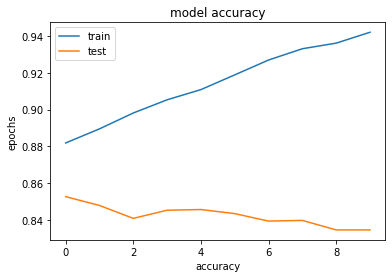

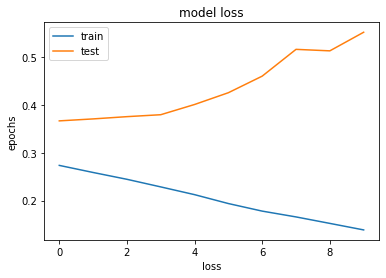

In [ ]:
#print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.legend(["train", "test"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend(["train", "test"])
plt.show()


# the  problem is overfitting becauese is doing well on training set and not on valuidation set 
#  i will
